#Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

For this challenge, we'll be going through the Titanic dataset. The known target in this dataset is the boolean feature Survival:

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import ensemble
from IPython.display import Image
import pydotplus
import graphviz
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))

**For this challenge, we'll be going through the Titanic dataset. The known target in this dataset is the boolean feature Survived:**

In [4]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


**This looks like a simple dataset with a few features to play with. Let's see how many of these features need cleaning:**

In [5]:
data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

The dataset seems to be clean and ready to feed into the decision tree. First, let's explore of feature distributions and make sure we understand all of them before proceeding:

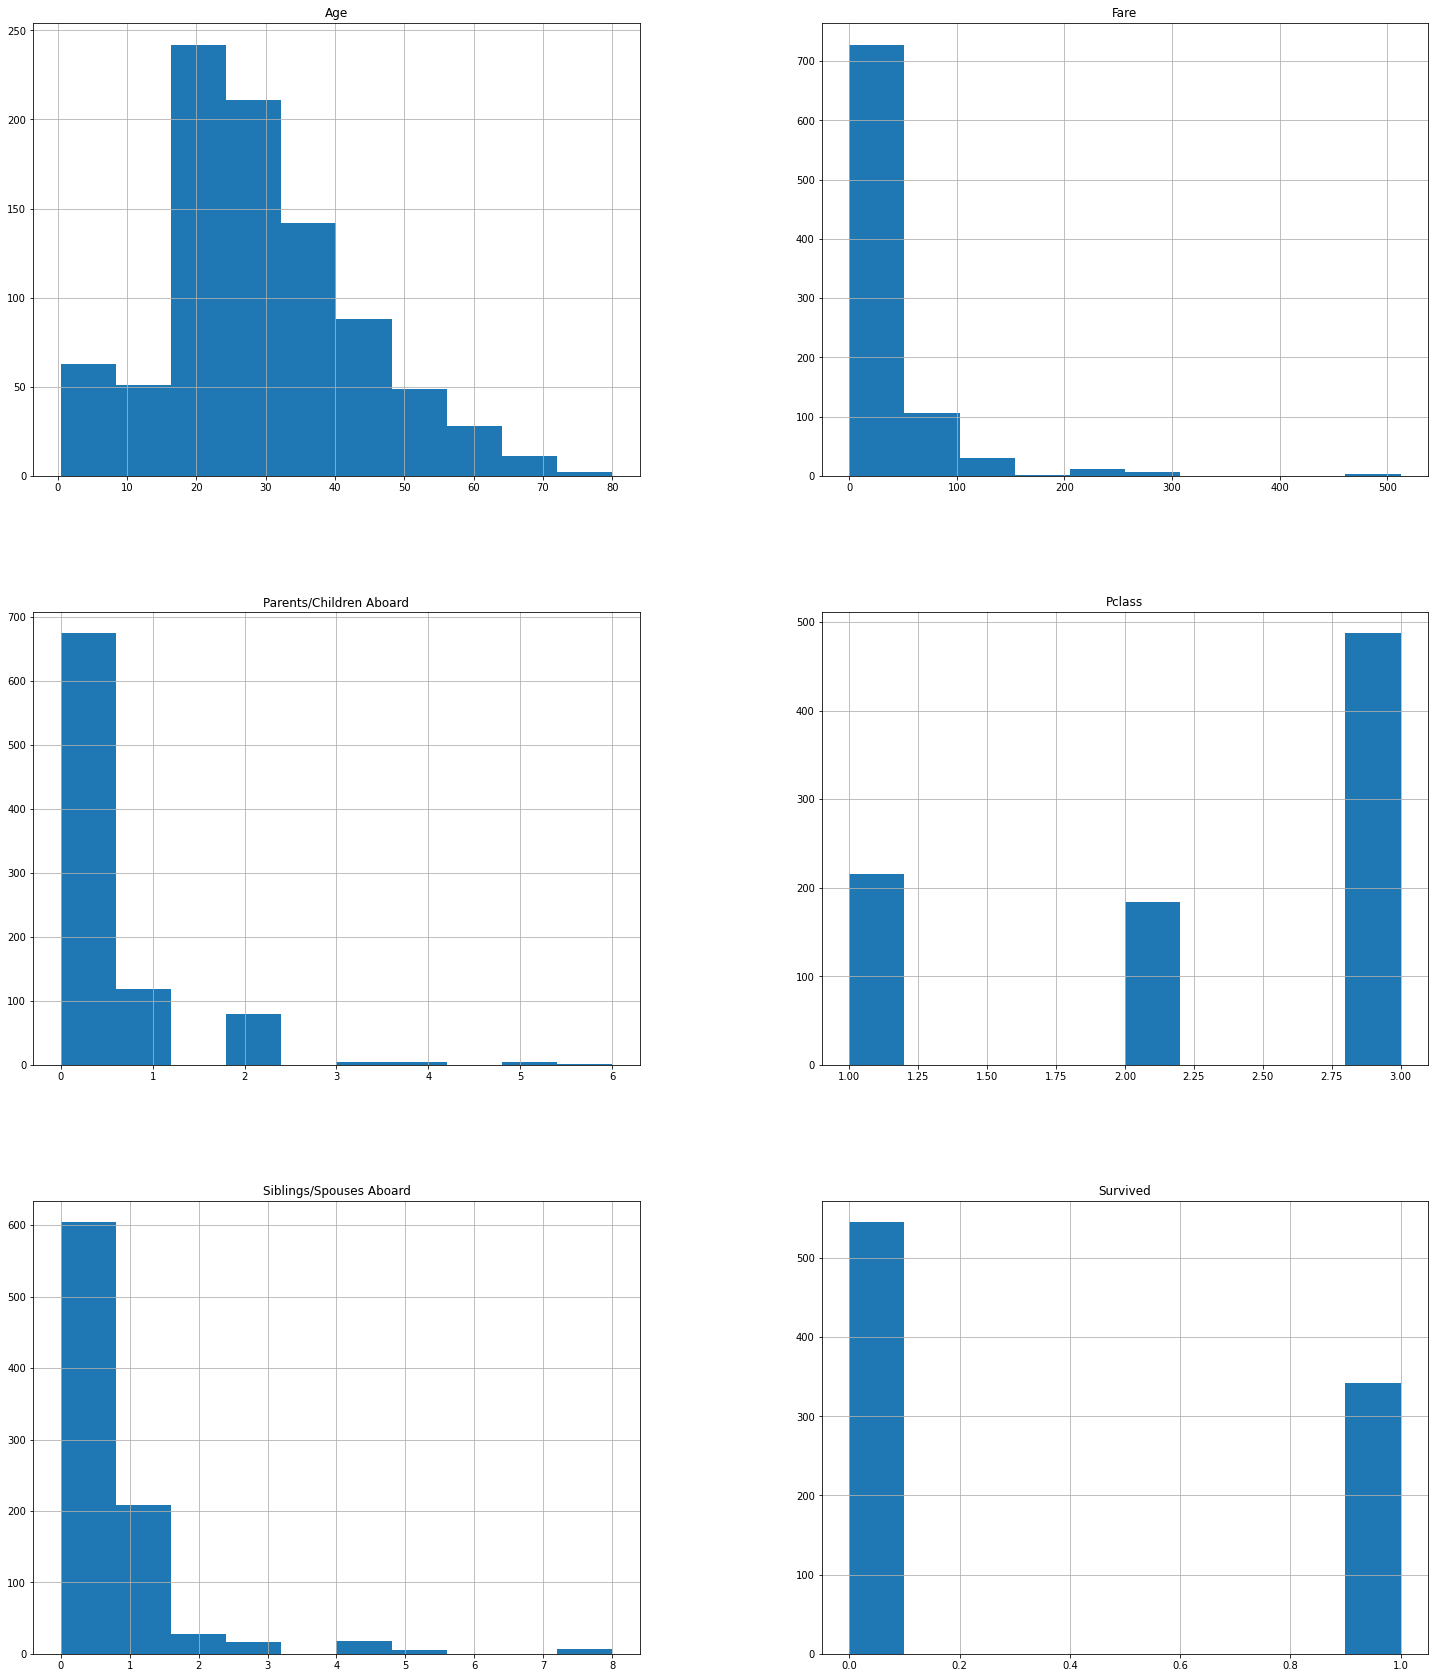

In [6]:
data.hist(figsize=(25,30))
plt.show()

The features are simple enough to understand. Ages were mostly 20 - 40 aboard the ship, fare was less than $100 for most, and most people were alone and relatively few were with their families. Most passengers rode in the 3rd class, and most were males.

Nothing seems concerning about the data and it seems good to go:

In [7]:
data = pd.concat([data, pd.get_dummies(data['Sex'], prefix='male')],axis=1).drop(['male_female','Sex','Name'],axis=1)
X = data.drop(columns=['Survived'])
Y = data['Survived']

Now that we have split our target and features, let's start building our models:

In [11]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=6,
    max_depth=20,
    random_state = 1337
)


# %timeit decision_tree.fit(X, Y)
# %timeit decision_tree.score(X,Y)

%timeit decision_tree.fit(X, Y)
%timeit print(decision_tree.score(X,Y))

100 loops, best of 3: 3.51 ms per loop
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.9819616685456595
0.981961668